Predicting the Quality of Candidature Motivation Letters: Good or Not Good

1 - Problem Statement:

Last year, I was as a volunteer project reviewer for a scholarship program. This initiative received 200,000+ candidatures. Candidates were expected to undertake a project and then provide reflective answers to several questions. A significant challenge we faced was the limited number of reviewers at our disposal. Although the institution had implemented a system to prioritize candidature submissions for review, it wasn't effective. I recall having to assess candidatures that were mostly emptied or were poorly articulated. Even though I'm not associated with them, they approached me a few months ago with a proposal: to aid them in devising a more efficient filter that could accurately predict the quality of candidatures before they reached the reviewers. Although I didn't collaborate with them eventually, I am deeply fascinated by this field.

2 - My Solution:

Initially, I developed a sample of machine learning application that leveraged Bayes's theorem and the Naive Bayes Classifier Model to filter out unqualified dummy candidatures. I took the inspiration from the statistic part of the Computational Learning Module from Chloe. Here's a glimpse of the work through this Google sheet: https://docs.google.com/spreadsheets/d/1d5d1kW_59YjTIEyqpuqE2iYJvZd6thJO6WrmPfBvHmE/edit?usp=sharing.

The introduction to the "Deep Learning" segment in the Digital Expert module piqued my curiosity. I delved into this topic and am currently working through a tutorial by Machine Learnia on YouTube: https://www.youtube.com/@MachineLearnia, where the goal is to develop an artificial neural network to distinguish between images of dogs and cats. An aspect of this tutorial was the creation of a simple perceptron model designed to identify toxic plants based on leaf dimensions (Neuron_predicts_plants_toxicity.ipynb). I was inspired to adapt this for a candidature database.

3 - My Implementation:

The goal is to create an artificial neuron that separates the good and bad motivation letters submitted by candidates. I created a dummy database "training_candidatures.csv" with the random function to train my neuron. I then tested my neuron with a testing_candidature.csv database and assessed the accuracy of my neuron.

I used several mathematics functions to implement the algorithm:
- Linear function: z(x1, x2)= w1 * x1 + w2 * x2 + b
- Sigmoid function: a(z) = 1 / (1 + e^(-z))
- Log Loss function: L = L = -(1/m) * Σ[yi * log(ai) + (1 - yi) * log(1 - ai)]
- Gradient Descent Weight Update function: W = W - α * (∂L/∂W)

I used derivatives to calculate the Log Loss gradients and turned the formulas into vector formulas so we can streamline the process and avoid using "FOR" loops.

4 - Short Reflection:

The accuracy of my model on the test dataset hovers around 60% when comparing its predictions against the reviewer's judgments in the database. However, the results aren't entirely reliable since I generated the reviewer's judgments randomly. One way to enhance the model would be to train it on real-world data. Additionally, refining the features of the motivation letters might lead to better outcomes. It's worth noting that my current model may not scale well to larger datasets due to potential overfitting issues.

In [1]:
import csv
import random
import pandas as pd

filename = "training_candidatures.csv"

In [2]:
def judge_letter(basic_info, length, inappropriate_keywords, repetitive_content):
    good_chance = 0.5  # Base probability

    if basic_info == "Yes":
        good_chance += 0.2  # Increase chance by 20% if basic info is present

    if 250 <= length <= 350:
        good_chance += 0.1  # Increase chance by 10% for optimal length

    if inappropriate_keywords == "Yes":
        good_chance -= 0.3  # Decrease chance by 30% if inappropriate keywords are present

    if repetitive_content == "Yes":
        good_chance -= 0.2  # Decrease chance by 20% if content is repetitive

    return "Good" if random.random() < good_chance else "Not Good"

In [3]:
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID", "Basic Information Presence", "Letter Length",
                    "Inappropriate Keywords", "Repetitive Content", "Reviewer's Judgment"])

    for i in range(1, 1001):
        basic_info = "Yes" if random.choice([True, True, False]) else "No"
        length = random.randint(200, 500)
        inappropriate_keywords = "Yes" if random.choice(
            [True, False, False, False]) else "No"
        repetitive_content = "Yes" if random.choice(
            [True, False, False]) else "No"

        judgment = judge_letter(
            basic_info, length, inappropriate_keywords, repetitive_content)

        writer.writerow(
            [i, basic_info, length, inappropriate_keywords, repetitive_content, judgment])

In [4]:
# Load the CSV into a DataFrame
df = pd.read_csv("training_candidatures.csv")

# Display the first 10 rows
df.head(10)

,ID,Basic Information Presence,Letter Length,Inappropriate Keywords,Repetitive Content,Reviewer's Judgment
0,1,Yes,301,No,No,Good
1,2,Yes,204,No,No,Good
2,3,No,467,Yes,Yes,Not Good
3,4,No,401,No,Yes,Good
4,5,No,222,Yes,No,Good
5,6,Yes,311,Yes,No,Not Good
6,7,Yes,230,No,Yes,Not Good
7,8,Yes,361,No,No,Good
8,9,Yes,238,No,No,Good
9,10,No,380,No,Yes,Not Good


In [5]:
# Load the data
df = pd.read_csv("training_candidatures.csv")

In [6]:
# Convert categorical columns to numerical
df["Basic Information Presence"] = df["Basic Information Presence"].map({
                                                                        "Yes": 1, "No": 0})
df["Inappropriate Keywords"] = df["Inappropriate Keywords"].map({
                                                                "Yes": 1, "No": 0})
df["Repetitive Content"] = df["Repetitive Content"].map({"Yes": 1, "No": 0})
df["Reviewer's Judgment"] = df["Reviewer's Judgment"].map(
    {"Good": 1, "Not Good": 0})

In [7]:
# Extract features and target
X = df[["Basic Information Presence", "Letter Length",
        "Inappropriate Keywords", "Repetitive Content"]].values
y = df["Reviewer's Judgment"].values.reshape(-1, 1)

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
import numpy as np


def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [11]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [12]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [13]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [14]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [15]:
import matplotlib.pyplot as plt


def artificial_neuron(X, y, learning_rate=0.001, n_iter=10000, plot_loss=False):
    # initialize W,b
    W, b = initialisation(X)
    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    # Optional plotting of loss
    if plot_loss:
        plt.plot(Loss)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()

    return (W, b)

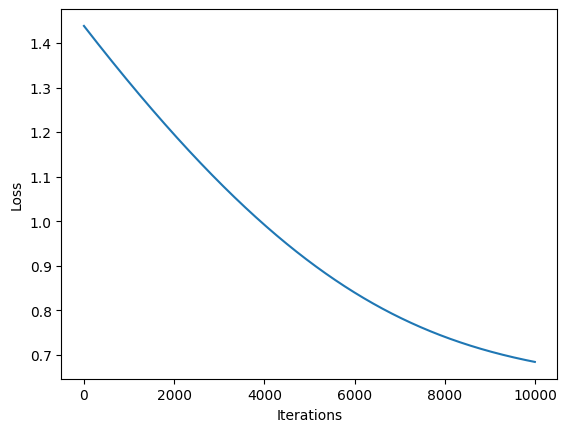

In [16]:
W, b = artificial_neuron(X_train, y_train, plot_loss=True)

In [17]:
# Generating test_candidatures.csv
filename_test = "testing_candidatures.csv"

with open(filename_test, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID", "Basic Information Presence", "Letter Length",
                    "Inappropriate Keywords", "Repetitive Content", "Reviewer's Judgment"])

    for i in range(1001, 2001):  # IDs 1001 to 2000 for distinction
        basic_info = "Yes" if random.choice([True, True, False]) else "No"
        length = random.randint(200, 500)
        inappropriate_keywords = "Yes" if random.choice(
            [True, False, False, False]) else "No"
        repetitive_content = "Yes" if random.choice(
            [True, False, False]) else "No"

        judgment = judge_letter(
            basic_info, length, inappropriate_keywords, repetitive_content)

        writer.writerow(
            [i, basic_info, length, inappropriate_keywords, repetitive_content, judgment])

In [18]:
# Load the test_training.csv into a DataFrame
df = pd.read_csv("testing_candidatures.csv")

# Display the first 10 rows
df.head(10)

,ID,Basic Information Presence,Letter Length,Inappropriate Keywords,Repetitive Content,Reviewer's Judgment
0,1001,Yes,218,No,Yes,Not Good
1,1002,No,337,No,Yes,Good
2,1003,Yes,324,Yes,No,Good
3,1004,Yes,298,No,No,Good
4,1005,Yes,493,No,Yes,Good
5,1006,Yes,401,No,No,Good
6,1007,Yes,373,Yes,No,Good
7,1008,No,497,No,No,Good
8,1009,Yes,397,No,No,Not Good
9,1010,Yes,248,No,No,Good


In [19]:
# Load the testing data
df_test = pd.read_csv("testing_candidatures.csv")

# Convert categorical columns to numerical
df_test["Basic Information Presence"] = df_test["Basic Information Presence"].map({
                                                                                  "Yes": 1, "No": 0})
df_test["Inappropriate Keywords"] = df_test["Inappropriate Keywords"].map({
                                                                          "Yes": 1, "No": 0})
df_test["Repetitive Content"] = df_test["Repetitive Content"].map({
                                                                  "Yes": 1, "No": 0})

# Extract features and target
X_test_actual = df_test[["Basic Information Presence", "Letter Length",
                         "Inappropriate Keywords", "Repetitive Content"]].values
y_test_actual = df_test["Reviewer's Judgment"].map(
    {"Good": 1, "Not Good": 0}).values.reshape(-1, 1)

# Standardize the features using the scaler trained on the training set
X_test_actual = scaler.transform(X_test_actual)

In [20]:
def predict(X, W, b):
    A = model(X, W, b)
    return (A > 0.5).astype(int)


y_pred = predict(X_test_actual, W, b)

In [21]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test_actual, y_pred)
print(f"Accuracy on the test set: {accuracy * 100: .2f}%")

Accuracy on the test set: 61.30%
